In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('data_full_5sekres.xlsx')

In [6]:
df1 = df.copy()

In [55]:
#Create a column of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1['BaseLoad'] = 300
df1.loc[df1['operationId'] == 6, 'BaseLoad'] = 0
df1.loc[df1['operationId'] == 1, 'BaseLoad'] = 0
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

df1['Battery'] = 0
df1['SOC'] = 0
#Create dataset with only relevant columns
df3 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'BaseLoad', 'Battery', 'SOC']]

#Set engine powers to zero
num = df3['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df3['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


display(df3)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,BaseLoad,Battery,SOC
0,2020-01-30 00:00:00,0.0,0.0,0.0,0,0.0,6.0,0,0,0
1,2020-01-30 00:00:05,0.0,0.0,0.0,0,0.0,6.0,0,0,0
2,2020-01-30 00:00:10,0.0,0.0,0.0,0,0.0,6.0,0,0,0
3,2020-01-30 00:00:15,0.0,0.0,0.0,0,0.0,6.0,0,0,0
4,2020-01-30 00:00:20,0.0,0.0,0.0,0,0.0,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,1796.0,0.0,0.0,0,0.0,3.0,300,0,0
120956,2020-02-05 23:59:40,1743.2,0.0,0.0,0,0.0,3.0,300,0,0
120957,2020-02-05 23:59:45,1725.6,0.0,0.0,0,0.0,3.0,300,0,0
120958,2020-02-05 23:59:50,1760.8,0.0,0.0,0,0.0,3.0,300,0,0


In [ ]:
df5 = df3.copy()

load = df5['Load'].values
dg0 = df5['engMdoPower_0_'].values
dg1 = df5['engMdoPower_1_'].values
dg2 = df5['engMdoPower_2_'].values
dg3 = df5['engMdoPower_3_'].values
bat = df5['Battery'].values
soc = [0]*120960
soc[0] = 124 #124 empty (20%)
opid = df5['operationId'].values


for i in range(len(load)):
    if i == 120959:
        pass
    elif load[i] <= 2100 and load[i+1] <= 2100: 
        if opid[i] == 100 and soc[i] <= 124: #DP MODE, empty battery, two generators
            bat[i] = -100
            soc[i+1] = soc[i] - bat[i]/720
            dg0[i] = dg1[i] = (load[i] - bat[i])/2
        elif opid[i] == 100 and soc[i] > 124: #DP MODE, battery spinning reserve
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0 = load[i]
        elif opid[i] == 3 and soc[i] > 124:#Transit
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]
        elif opid[i] == 5:
        elif opid[i] == 7: #standby
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]            
        elif opid[i] == 6: #Port shore connection
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = 0             
        elif opid[i] == 1: #Port normal
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i] 
    elif load[i] <= 2100 and load[i+1] > 2100
    
    elif load[i] <= 4200: #DP mode low load, single generator and battery as spinning reserve
        if opid[i] == 100:
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]
        elif opid[i] == 3 or opid[i] == 5: #Transit
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]
        elif opid[i] == 7: #standby
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]            
        elif opid[i] == 6: #Port shore connection
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = 0             
        elif opid[i] == 1: #Port normal
            bat[i] = 0
            soc[i+1] = soc[i]
            dg0[i] = load[i]         
      

In [98]:
df5 = df3.copy()

load = df5['Load'].values
dg0 = df5['engMdoPower_0_'].values
dg1 = df5['engMdoPower_1_'].values
dg2 = df5['engMdoPower_2_'].values
dg3 = df5['engMdoPower_3_'].values
bat = df5['Battery'].values
soc = [0]*120960
soc[0] = 496 #124 empty (20%)
soc[1] = 496
opid = df5['operationId'].values

for i in range(len(load)):
    if i == 120959:
        pass
    elif opid[i] == 100:
        if load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i] <= 4200:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    elif opid[i] == 3 or opid[i] == 5:
        if load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-1] <= 2100:
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        else:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    elif opid[i] != 100 and opid[i] != 3 and opid[i] != 5:
        if load[i] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        else: 
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]            
        
            



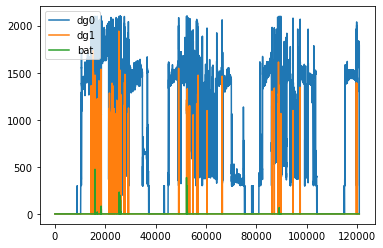

In [99]:
# DP mode, battery is used for spinning reserve 
for i in range(len(load)):
    if opid[i] == 100:
        if load[i] <= 2100 and load[i+1] <= 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] <= 2100 and load[i+1] > 2100:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
        elif load[i] > 2100 and load[i-1] < 2100: # if the load is over 2100 for less than 5 seconds battery covers
            dg0[i] = 2100
            bat[i] = load[i] - dg0[i]
            soc[i+1] = soc[i] - bat[i]/720
        elif load[i] > 2100 and load[i-1] > 2100:
            dg0[i] = dg1[i] = load[i]/2
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i]
        
#Transit mode
for i in range(len(load)):
    if opid[i] == 3 or opid[i] == 5:
        
            
            
            
        



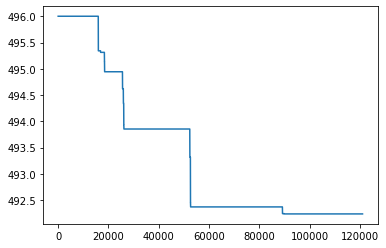

In [100]:
plt.plot(soc)#[14420:14425])
#plt.plot(opid[14420:14425])
#plt.plot(load[14420:14425])

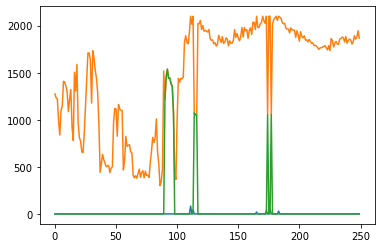

In [101]:
plt.plot(bat[18250:18500])
plt.plot(dg0[18250:18500])
plt.plot(dg1[18250:18500])